In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ensuring datetime columns are in format 
# was getting errors in time-related testing below pre-parse
df = pd.read_csv("AML_FlowerShop.csv", parse_dates=["Send DateTime", "Pay DateTime"])
df.head()

# high-level data quality checks done via Excel -- initially import failed from CSV conversion error from XLSX file

,Unnamed: 0,Send DateTime,Pay DateTime,Amount,Sender Name_,Sender Address_,Sender ID1 info,Sender City,Sender State,Payee Name_,...,Send Agent State,Send Country,Send Operator Name_,Pay Agent Name_,Pay Agent City,Pay Agent State,Pay Country,Pay Operator Name_,Sender Age,Payee Age
0,0,2015-12-26 13:01:00,2015-12-28 09:19:00,990.0,name_1,address_1,1,PALO ALTO,CA,name_742,...,CA,UNITED STATES,operator_name_3,agent_1,MORELIA,NaN,MEXICO,operator_name_0,40.0,NaN
1,1,2015-12-28 15:36:00,2015-12-28 19:15:00,690.0,name_2,address_2,0,SAN JOSE,CA,name_3020,...,CA,UNITED STATES,operator_name_12,agent_2,MANZANILLO,NaN,MEXICO,operator_name_0,50.0,NaN
2,2,2015-11-30 20:55:00,2015-12-01 18:39:00,990.0,name_3,address_3,1,REDWOOD CITY,CA,name_3021,...,CA,UNITED STATES,operator_name_3,agent_3,YANGA,NaN,MEXICO,operator_name_0,47.0,NaN
3,3,2015-12-08 15:33:00,2015-12-08 17:37:00,1000.0,name_4,address_4,1,SAN CARLOS,CA,name_2609,...,CA,UNITED STATES,operator_name_12,agent_4,GUADALAJARA,NaN,MEXICO,operator_name_0,51.0,53.0
4,4,2015-12-10 14:48:00,2015-12-10 15:48:00,830.0,name_5,address_5,0,EAST PALO ALTO,CA,name_3022,...,CA,UNITED STATES,operator_name_12,agent_5,SAN SALVADOR,NaN,EL SALVADOR,operator_name_0,49.0,NaN


In [143]:
# dataset summary & overview

df.shape
df.columns
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           11399 non-null  int64         
 1   Send DateTime        11399 non-null  datetime64[ns]
 2   Pay DateTime         11388 non-null  datetime64[ns]
 3   Amount               11399 non-null  float64       
 4   Sender Name_         11399 non-null  object        
 5   Sender Address_      11399 non-null  object        
 6   Sender ID1 info      11399 non-null  int64         
 7   Sender City          11394 non-null  object        
 8   Sender State         11229 non-null  object        
 9   Payee Name_          11399 non-null  object        
 10  Payee Address_       11399 non-null  object        
 11  Payee ID1 info       11399 non-null  int64         
 12  Payee City           10728 non-null  object        
 13  Payee State          3535 non-n

Unnamed: 0                0
Send DateTime             0
Pay DateTime             11
Amount                    0
Sender Name_              0
Sender Address_           0
Sender ID1 info           0
Sender City               5
Sender State            170
Payee Name_               0
Payee Address_            0
Payee ID1 info            0
Payee City              671
Payee State            7864
Send Agent Name_          0
Send Agent City           0
Send Agent State        185
Send Country              0
Send Operator Name_       0
Pay Agent Name_           0
Pay Agent City           11
Pay Agent State        7318
Pay Country              11
Pay Operator Name_        0
Sender Age             2820
Payee Age              3383
dtype: int64

In [144]:
# stats summary (will utilize for setting benchmarks/thresholds while analyzing visuals)

df['Amount'].describe().apply(lambda x: round(x, 2))

count    11399.00
mean       909.94
std        515.88
min         30.00
25%        589.77
50%        833.00
75%       1000.00
max       9000.00
Name: Amount, dtype: float64

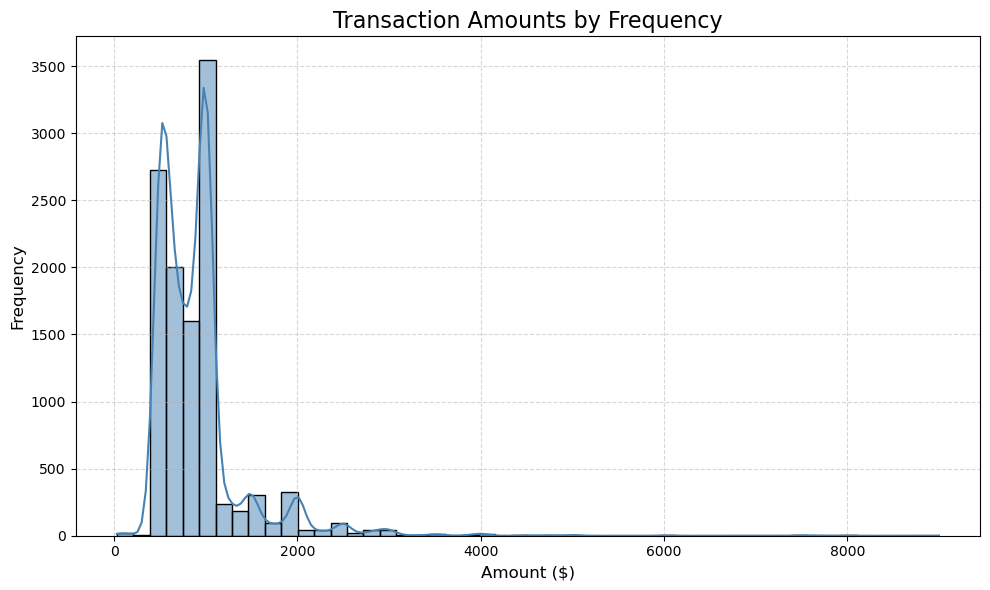

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualize transactions ($) distribution (note most frequent amts, identify outliers)
# the bulk of of FlowerShop transactions fall between $0 and $2k, with the highest at $9k (zoom-ins below)

plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='steelblue')

plt.title("Transaction Amounts by Frequency", fontsize=16)
plt.xlabel("Amount ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

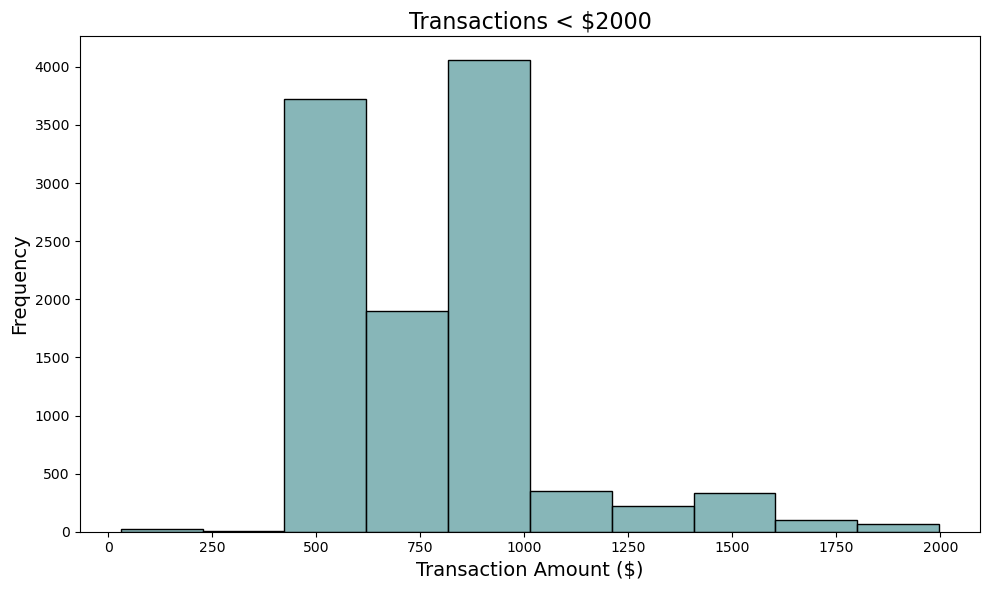

In [146]:
# most transactions fall below $2k

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Amount'] < 2000]['Amount'], bins=10, color='cadetblue')
plt.title("Transactions < $2000", fontsize=16)
plt.xlabel("Transaction Amount ($)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

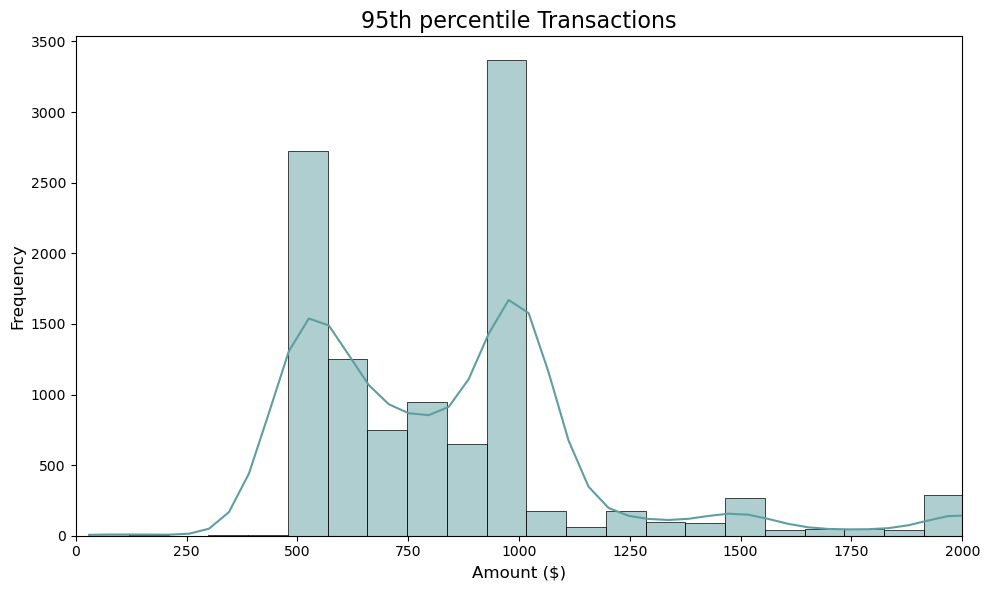

count    11399.000000
mean       909.937714
std        515.876752
min         30.000000
25%        589.770000
50%        833.000000
75%       1000.000000
max       9000.000000
Name: Amount, dtype: float64


In [147]:
# zoom-in of the transaction amounts in the 95% quantile 
# (assumption above was correct - between $0 - $2k

plt.figure(figsize=(10, 6))
sns.histplot(df["Amount"], bins=100, kde=True, color='cadetblue')
plt.title("95th percentile Transactions", fontsize=16)
plt.xlabel("Amount ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, df["Amount"].quantile(0.95)) 
plt.tight_layout()
plt.show()

# including stats summary again below chart 

print(df["Amount"].describe())

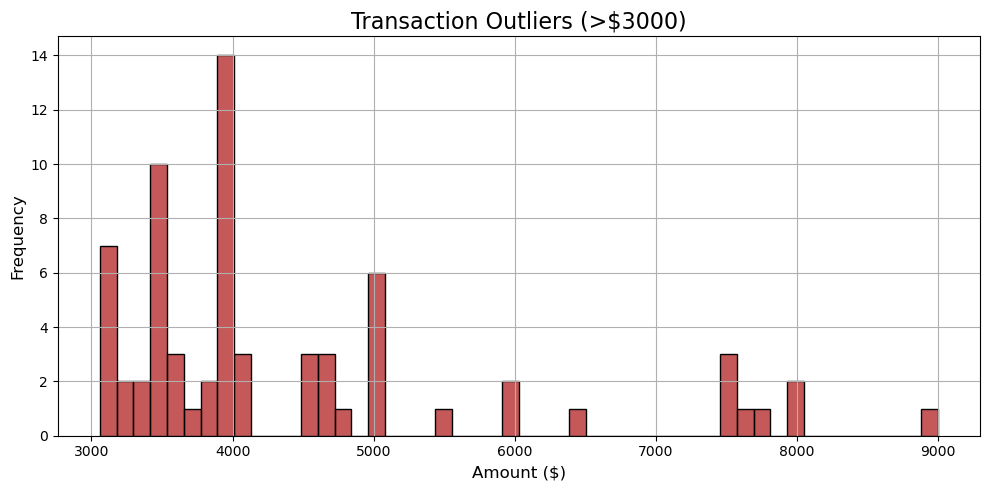

In [148]:
# tail-end outliers (not visible above)
# between $2k and $4k is where the visibility concedes 
# we know the highest transaction amount is $9k from step above

high_txns = df[df['Amount'] > 3000]

plt.figure(figsize=(10, 5))
sns.histplot(high_txns['Amount'], bins=50, color='firebrick')

plt.title("Transaction Outliers (>$3000)", fontsize=16)
plt.xlabel("Amount ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/3319279042.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_senders.values, y=freq_senders.index, palette="Reds_d")


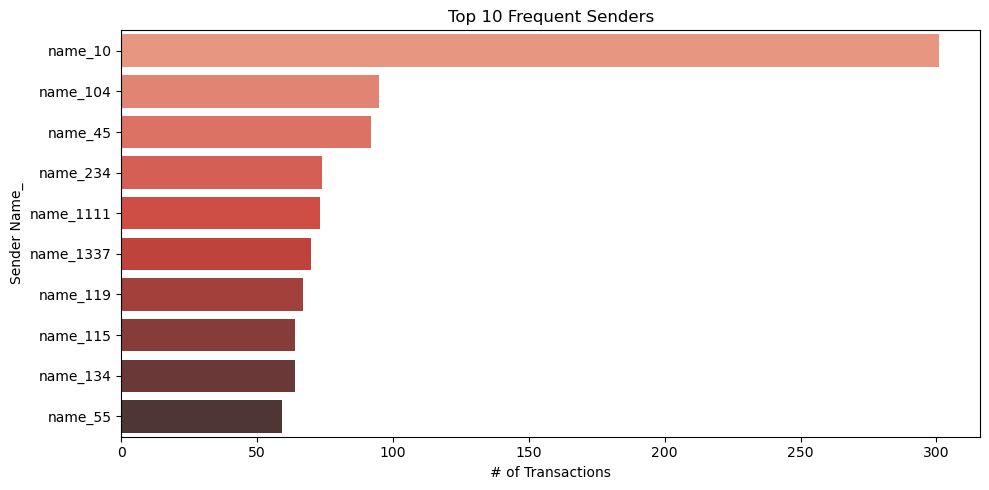

In [149]:
# count of top frequent senders
freq_senders = df["Sender Name_"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=freq_senders.values, y=freq_senders.index, palette="Reds_d")
plt.title("Top 10 Frequent Senders")
plt.xlabel("# of Transactions")
plt.tight_layout()
plt.show()


In [150]:
# hard counts from above

df['Sender Name_'].value_counts().head(10)

Sender Name_
name_10      301
name_104      95
name_45       92
name_234      74
name_1111     73
name_1337     70
name_119      67
name_115      64
name_134      64
name_55       59
Name: count, dtype: int64

In [151]:
# checking counts of identification-provided vs non

df['Sender ID1 info'].value_counts()
df['Payee ID1 info'].value_counts()

Payee ID1 info
1    9706
0    1693
Name: count, dtype: int64

In [152]:
# identifying frequent same-party transactions

df.groupby(['Sender Name_', 'Payee Name_']).size().sort_values(ascending=False).head(10)

Sender Name_  Payee Name_
name_45       name_3062      82
name_1111     name_4344      70
name_1337     name_4779      46
name_1228     name_4512      44
name_26       name_3756      44
name_464      name_3522      40
name_390      name_3449      39
name_894      name_4051      35
name_31       name_3048      35
name_24       name_3041      34
dtype: int64

In [153]:
# looking at top counts of send and pay agents/locations

print("Top sender locations:")
print(df['Send Agent Name_'].value_counts().head(10))

print("Top payee locations:")
print(df['Pay Agent Name_'].value_counts().head(10))

Top sender locations:
Send Agent Name_
agent_11      10468
agent_39        291
agent_2792       18
agent_667        12
agent_2683       11
agent_246        11
agent_2050       10
agent_2636        9
agent_2572        9
agent_2631        8
Name: count, dtype: int64
Top payee locations:
Pay Agent Name_
agent_11     966
agent_39     200
agent_73     182
agent_16     166
agent_6      153
agent_266    130
agent_68      88
agent_10      80
agent_46      64
agent_115     63
Name: count, dtype: int64


/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/1590910272.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_per_sender.values, y=avg_per_sender.index, palette="Blues_d")


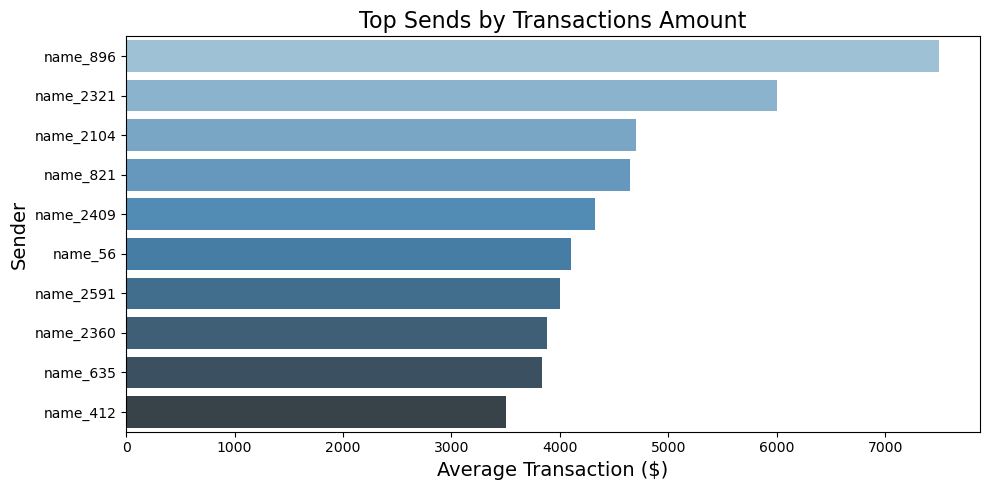

In [154]:
avg_per_sender = df.groupby('Sender Name_')['Amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_per_sender.values, y=avg_per_sender.index, palette="Blues_d")
plt.title("Top Sends by Transactions Amount", fontsize=16)
plt.xlabel("Average Transaction ($)", fontsize=14)
plt.ylabel("Sender", fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/219232656.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_per_agent.values, y=avg_per_agent.index, palette="Reds_d")


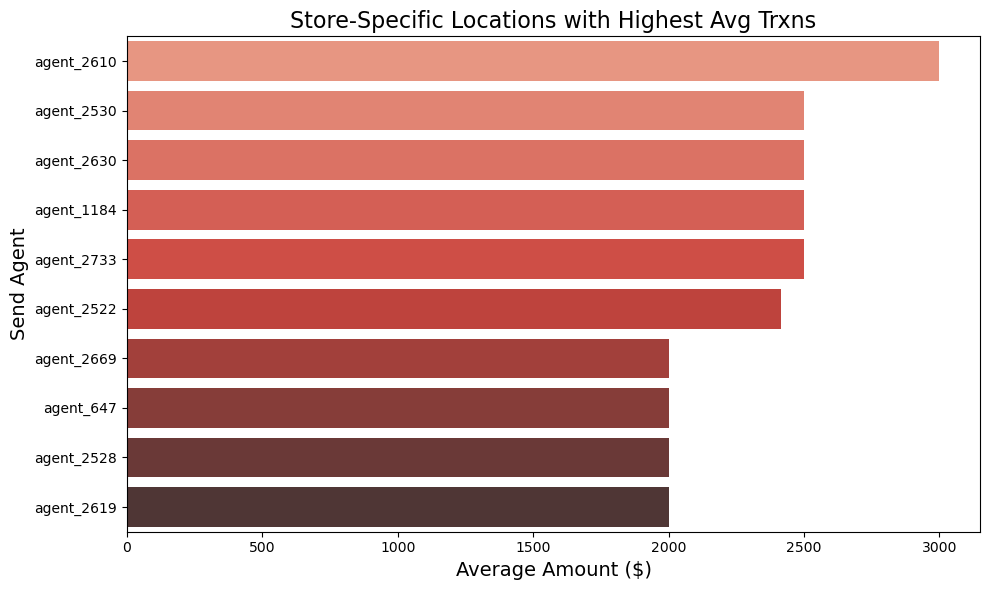

In [155]:
avg_per_agent = df.groupby('Send Agent Name_')['Amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_per_agent.values, y=avg_per_agent.index, palette="Reds_d")
plt.title("Store-Specific Locations with Highest Avg Trxns", fontsize=16)
plt.xlabel("Average Amount ($)", fontsize=14)
plt.ylabel("Send Agent", fontsize=14)
plt.tight_layout()
plt.show()

In [156]:
# time diff in hours

df["Hours_Diff"] = (df["Pay DateTime"] - df["Send DateTime"]).dt.total_seconds() / 3600

In [157]:
# create and count time diff bins / distributions

time_bins = [0, 0.083, 0.25, 0.5, 1, 3, 6, 12, 24, 48]  # in hours
labels = ['<=5min', '<=15min', '<=30min', '<=1h', '<=3h', '<=6h', '<=12h', '<=24h', '<=48h']

df['Time_Bin'] = pd.cut(df['Hours_Diff'], bins=time_bins, labels=labels, right=True)

# check distro

counts = df['Time_Bin'].value_counts().sort_index()
percentages = counts / len(df) * 100

summary = pd.DataFrame({'Count': counts, 'Percent %': percentages})
print(summary)

          Count  Percent %
Time_Bin                  
<=5min      139   1.219405
<=15min     150   1.315905
<=30min     248   2.175629
<=1h        780   6.842706
<=3h       1674  14.685499
<=6h       1004   8.807790
<=12h       358   3.140626
<=24h      3534  31.002720
<=48h      1825  16.010176


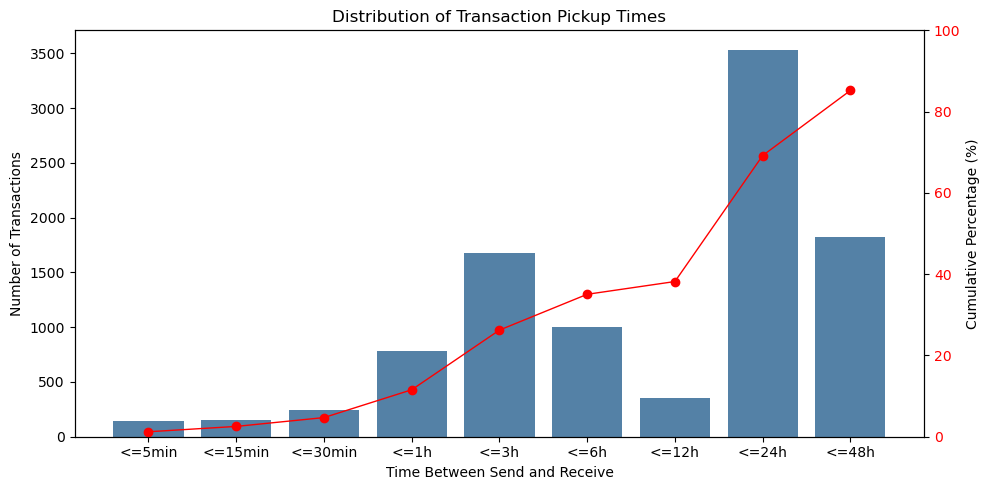

In [158]:
# visualizing time diff bins distribution 

time_bins = [0, 0.083, 0.25, 0.5, 1, 3, 6, 12, 24, 48]  # hours
labels = ['<=5min', '<=15min', '<=30min', '<=1h', '<=3h', '<=6h', '<=12h', '<=24h', '<=48h']

df['Time_Bin'] = pd.cut(df['Hours_Diff'], bins=time_bins, labels=labels, right=True)

counts = df['Time_Bin'].value_counts().sort_index()
percentages = counts / len(df) * 100
cumulative_percent = percentages.cumsum()

plt.figure(figsize=(10, 5))

# bar graph
sns.barplot(x=counts.index, y=counts.values, color='steelblue')
plt.ylabel('Number of Transactions')
plt.xlabel('Time Between Send and Receive')
plt.title('Distribution of Transaction Pickup Times')

# Add cumulative percentage line with a secondary y-axis (chatGPT)
ax2 = plt.twinx()
ax2.plot(cumulative_percent.index, cumulative_percent.values, color='red', marker='o', linestyle='-', linewidth=1)
ax2.set_ylabel('Cumulative Percentage (%)', color='black')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.show()

In [159]:
# senders who have multiple transactions within a suspiciously short time frame (< 5 mins per above) 

df = df.sort_values(by=['Sender Name_', 'Send DateTime'])

# time difference between each transaction for each sender by minute
df['Sender_Time_Diff_Min'] = df.groupby('Sender Name_')['Send DateTime'].diff().dt.total_seconds() / 60

# creating burst groups for gap > 5 min 
df['Burst_Flag'] = (df['Sender_Time_Diff_Min'] > 5) | (df['Sender_Time_Diff_Min'].isna())

# grouping by sender
df['Burst_ID'] = df.groupby('Sender Name_')['Burst_Flag'].cumsum()

# number of transactions per burst group
burst_sizes = df.groupby(['Sender Name_', 'Burst_ID']).size().reset_index(name='Burst_Size')

# filtering to more than 1 transaction within time window
suspicious_bursts = burst_sizes[burst_sizes['Burst_Size'] > 1]

# number of suspicious bursts per sender
suspicious_burst_counts = suspicious_bursts['Sender Name_'].value_counts()

print(suspicious_burst_counts.head(10))

unique_senders_with_suspicious_bursts = suspicious_bursts['Sender Name_'].nunique()
print(f"Total unique senders with suspicious bursts: {unique_senders_with_suspicious_bursts}")
total_suspicious_bursts = suspicious_bursts.shape[0]
print(f"Total suspicious bursts: {total_suspicious_bursts}")

Sender Name_
name_234     23
name_10      22
name_115     18
name_31      18
name_813     12
name_570     11
name_119     11
name_172      9
name_68       9
name_1129     9
Name: count, dtype: int64
Total unique senders with suspicious bursts: 267
Total suspicious bursts: 502


In [160]:
# now doing the same for sender/payee 

df = df.sort_values(by=['Sender Name_', 'Payee Name_', 'Send DateTime'])

# time diff now grouped by sender AND payee
df['SenderPayee_Time_Diff_Min'] = df.groupby(['Sender Name_', 'Payee Name_'])['Send DateTime'].diff().dt.total_seconds() / 60

# bursts where >5 minutes passed
df['SenderPayee_Burst_Flag'] = (df['SenderPayee_Time_Diff_Min'] > 5) | (df['SenderPayee_Time_Diff_Min'].isna())

# grouping by pairs
df['SenderPayee_Burst_ID'] = df.groupby(['Sender Name_', 'Payee Name_'])['SenderPayee_Burst_Flag'].cumsum()

# transactions per burst
sender_payee_bursts = df.groupby(['Sender Name_', 'Payee Name_', 'SenderPayee_Burst_ID']).size().reset_index(name='Burst_Size')

# filtering to > 1 transaction within time window
suspicious_sender_payee = sender_payee_bursts[sender_payee_bursts['Burst_Size'] > 1]

# count repeats
repeat_pair_counts = suspicious_sender_payee.groupby(['Sender Name_', 'Payee Name_']).size().sort_values(ascending=False)

print(repeat_pair_counts.head(10))


Sender Name_  Payee Name_
name_234      name_3269      2
name_2771     name_6811      2
name_2364     name_6174      2
name_125      name_4033      2
name_413      name_5461      1
name_570      name_6188      1
name_1448     name_4837      1
name_153      name_3170      1
name_1541     name_4983      1
name_1601     name_5083      1
dtype: int64


In [161]:
# looking at burts for send agents / store locations 
df = df.sort_values(by=['Send Agent Name_', 'Send DateTime'])

# time difference between sends per agent
df['Agent_Time_Diff_Min'] = df.groupby('Send Agent Name_')['Send DateTime'].diff().dt.total_seconds() / 60

# flag new bin burst
df['Agent_Burst_Flag'] = (df['Agent_Time_Diff_Min'] > 5) | (df['Agent_Time_Diff_Min'].isna())
df['Agent_Burst_ID'] = df.groupby('Send Agent Name_')['Agent_Burst_Flag'].cumsum()

#  transactions in each agent burst
agent_bursts = df.groupby(['Send Agent Name_', 'Agent_Burst_ID']).size().reset_index(name='Burst_Size')
agent_suspicious_bursts = agent_bursts[agent_bursts['Burst_Size'] > 1]
repeat_agent_counts = agent_suspicious_bursts['Send Agent Name_'].value_counts()
top_agents = repeat_agent_counts.head(10)
print(top_agents)

Send Agent Name_
agent_11      1028
agent_39        22
agent_2164       2
agent_1023       1
agent_2542       1
agent_2558       1
agent_2563       1
agent_2645       1
agent_2655       1
agent_937        1
Name: count, dtype: int64


In [162]:
pair_freq = df.groupby(["Sender Name_", "Payee Name_"]).size().reset_index(name="Transaction Count")

#  high-frequency pairs
high_pairs = pair_freq[pair_freq["Transaction Count"] >= 5].sort_values("Transaction Count", ascending=False)


print(high_pairs.head(10))


     Sender Name_ Payee Name_  Transaction Count
4332      name_45   name_3062                 82
461     name_1111   name_4344                 70
966     name_1337   name_4779                 46
3299      name_26   name_3756                 44
742     name_1228   name_4512                 44
4369     name_464   name_3522                 40
4186     name_390   name_3449                 39
5276     name_894   name_4051                 35
3941      name_31   name_3048                 35
2938      name_24   name_3041                 34


In [163]:
# unique payees per sender
sender_to_payees = df.groupby("Sender Name_")["Payee Name_"].nunique().reset_index(name="Unique Payees")

top_smurfers = sender_to_payees.sort_values("Unique Payees", ascending=False).head(10)
print(top_smurfers)


     Sender Name_  Unique Payees
1         name_10            246
2331      name_38             18
0          name_1             13
1745     name_257             13
2312     name_362             13
2449     name_486             13
2543     name_570             12
1490     name_234             11
2820      name_82             11
1056     name_195             10


In [164]:
# unique senders per payee
payee_from_senders = df.groupby("Payee Name_")["Sender Name_"].nunique().reset_index(name="Unique Senders")

top_aggregators = payee_from_senders.sort_values("Unique Senders", ascending=False).head(10)
print(top_aggregators)

     Payee Name_  Unique Senders
329    name_3054               6
2156   name_4841               5
403    name_3125               5
564    name_3281               5
4621    name_742               5
2128   name_4813               5
551    name_3269               5
92     name_1650               5
2477   name_5156               5
382    name_3104               5


In [165]:
# count transactions per sender per day
df["Send Date"] = df["Send DateTime"].dt.date
freq_by_day = df.groupby(["Sender Name_", "Send Date"]).size().reset_index(name="Tx Count")

# High-volume days
suspicious_days = freq_by_day[freq_by_day["Tx Count"] >= 3].sort_values("Tx Count", ascending=False)
print(suspicious_days.head(10))

     Sender Name_   Send Date  Tx Count
5402     name_234  2019-01-22         5
88        name_10  2016-12-16         4
6730    name_2771  2020-06-18         4
6728    name_2771  2020-04-08         4
5401     name_234  2018-11-08         4
20         name_1  2019-01-19         3
5740    name_2429  2020-07-07         3
2430     name_143  2019-05-10         3
2431     name_143  2019-05-11         3
3367     name_172  2016-11-25         3


/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/821796705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Operator Mismatch", palette="Blues_d")


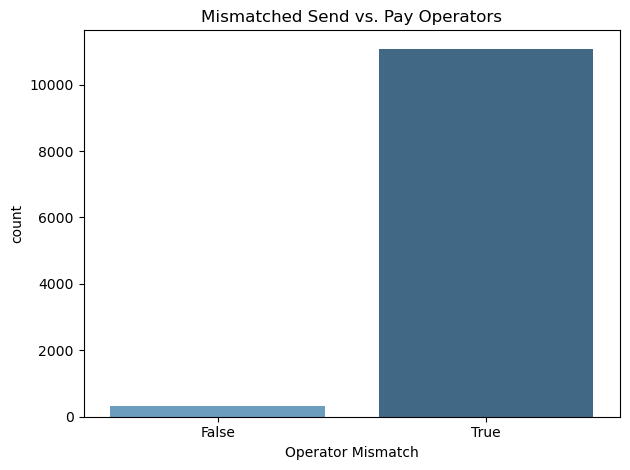

Operator mismatch breakdown:
Operator Mismatch
True     11079
False      320
Name: count, dtype: int64

Percentage breakdown:
Operator Mismatch
True     97.19%
False     2.81%
Name: count, dtype: object


In [166]:
# identifying operator mismatches (i.e., western union should be same for send and payee)
## this has led me to change my hypothesis in the above statement, and actually look into same operators

df["Operator Mismatch"] = df["Send Operator Name_"] != df["Pay Operator Name_"]
sns.countplot(data=df, x="Operator Mismatch", palette="Blues_d")
plt.title("Mismatched Send vs. Pay Operators")
plt.tight_layout()
plt.show()


# percentages
mismatch_counts = df["Operator Mismatch"].value_counts()
mismatch_percent = mismatch_counts / len(df) * 100

print("Operator mismatch breakdown:")
print(mismatch_counts)
print("\nPercentage breakdown:")
print(mismatch_percent.round(2).astype(str) + "%")

In [167]:
matching_ops = df[df["Send Operator Name_"] == df["Pay Operator Name_"]]

count_matching = len(matching_ops)
total_txns = len(df)
percent_matching = count_matching / total_txns * 100

print(f"Total transactions: {total_txns}")
print(f"Matching operator transactions: {count_matching} ({percent_matching:.2f}%)")

# mean and median transaction amounts
mean_amt = matching_ops["Amount"].mean()
median_amt = matching_ops["Amount"].median()

print(f"\nMean amount: ${mean_amt:,.2f}")
print(f"Median amount: ${median_amt:,.2f}")

# over $1K and $5K
over_1k = (matching_ops["Amount"] >= 1000).sum()
over_5k = (matching_ops["Amount"] >= 5000).sum()

percent_over_1k = over_1k / count_matching * 100
percent_over_5k = over_5k / count_matching * 100

print(f"\nTransactions >= $1K: {over_1k} ({percent_over_1k:.2f}%)")
print(f"Transactions >= $5K: {over_5k} ({percent_over_5k:.2f}%)")


Total transactions: 11399
Matching operator transactions: 320 (2.81%)

Mean amount: $840.06
Median amount: $800.00

Transactions >= $1K: 120 (37.50%)
Transactions >= $5K: 1 (0.31%)


                                        count  mean_amount  median_amount  \
Operator Pair                                                               
operator_name_0 to operator_name_0        289       836.12          800.0   
operator_name_12 to operator_name_12       14       868.57          930.0   
operator_name_316 to operator_name_316      8      1062.50          900.0   
operator_name_532 to operator_name_532      5       800.00         1000.0   
operator_name_3 to operator_name_3          3       666.67          550.0   
operator_name_2 to operator_name_2          1       521.00          521.0   

                                        max_amount  percent_over_1k  \
Operator Pair                                                         
operator_name_0 to operator_name_0          5000.0            10.03   
operator_name_12 to operator_name_12        1350.0             7.14   
operator_name_316 to operator_name_316      2000.0            25.00   
operator_name_532 to operato

/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/3411490424.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['count'], y=report.index, palette="Blues_d")


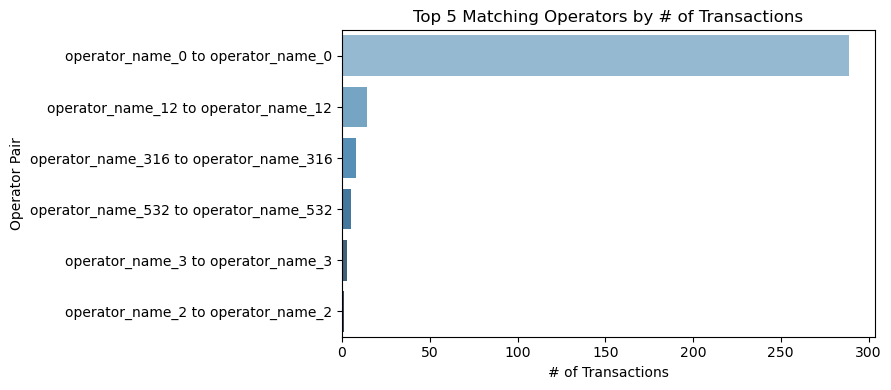

/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/3411490424.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['mean_amount'], y=report.index, palette="Reds_d")


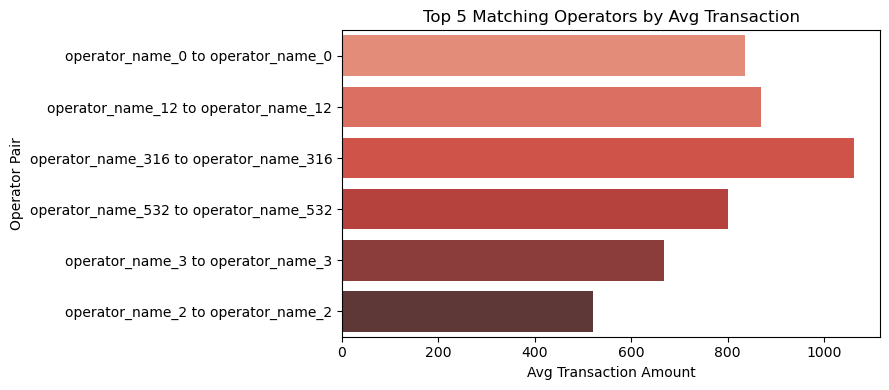

In [169]:
# now i am looking at the matching ones, as its only ~3% of the pairs
matching_df = df[df["Send Operator Name_"] == df["Pay Operator Name_"]].copy()

matching_df["Operator Pair"] = matching_df["Send Operator Name_"] + " to " + matching_df["Pay Operator Name_"]

# thresholds for high-value flags
thresholds = [1000, 5000]

# add helper columns for thresholds -- 
# come back to this
for t in thresholds:
    matching_df[f"Over_{t}"] = matching_df["Amount"] > t

# group by operator pair and calculate key stats + sender/payee info
grouped = matching_df.groupby("Operator Pair").agg(
    count=("Amount", "count"),
    mean_amount=("Amount", "mean"),
    median_amount=("Amount", "median"),
    max_amount=("Amount", "max"),
    percent_over_1k=("Over_1000", lambda x: 100 * x.sum() / x.count()),
    percent_over_5k=("Over_5000", lambda x: 100 * x.sum() / x.count())
).sort_values(by="count", ascending=False).head(10)

def most_common(series):
    return series.mode().iloc[0] if not series.mode().empty else None

extra_info = matching_df.groupby("Operator Pair").agg(
    top_sender=("Sender Name_", most_common),
    top_payee=("Payee Name_", most_common),
    top_send_country=("Send Country", most_common),
    top_pay_country=("Pay Country", most_common)
)

# Combine stats and extra info
report = grouped.join(extra_info).round(2)

print(report)

# count of transactions by operator pair
plt.figure(figsize=(9, 4))
sns.barplot(x=report['count'], y=report.index, palette="Blues_d")
plt.xlabel("# of Transactions")
plt.ylabel("Operator Pair")
plt.title("Top 5 Matching Operators by # of Transactions")
plt.tight_layout()
plt.show()

#  average transaction amount
plt.figure(figsize=(9, 4))
sns.barplot(x=report['mean_amount'], y=report.index, palette="Reds_d")
plt.xlabel("Avg Transaction Amount")
plt.ylabel("Operator Pair")
plt.title("Top 5 Matching Operators by Avg Transaction")
plt.tight_layout()
plt.show()


Sender ID Info:
Sender ID1 info
Provided    62.69%
Missing     37.31%
Name: proportion, dtype: object

Payee ID Info:
Payee ID1 info
Provided    85.15%
Missing     14.85%
Name: proportion, dtype: object


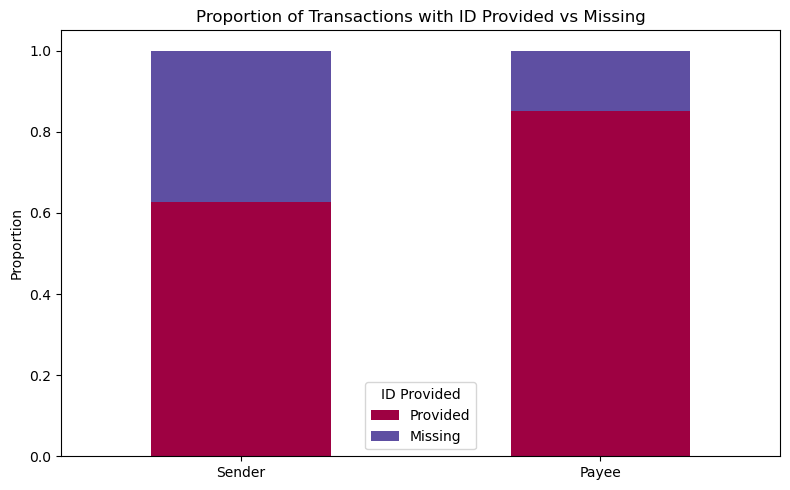

In [170]:
# checking amount of those who provided ID vs not
df["Sender ID1 info"] = df["Sender ID1 info"].astype(int)
df["Payee ID1 info"] = df["Payee ID1 info"].astype(int)

# missing IDs rate
missing_id = pd.DataFrame({
    "Sender": df["Sender ID1 info"].value_counts(normalize=True).rename({1: "Provided", 0: "Missing"}),
    "Payee": df["Payee ID1 info"].value_counts(normalize=True).rename({1: "Provided", 0: "Missing"})
}).T


sender_id_pct = df["Sender ID1 info"].value_counts(normalize=True) * 100
payee_id_pct = df["Payee ID1 info"].value_counts(normalize=True) * 100

print("Sender ID Info:")
print(sender_id_pct.rename({1: "Provided", 0: "Missing"}).round(2).astype(str) + "%")

print("\nPayee ID Info:")
print(payee_id_pct.rename({1: "Provided", 0: "Missing"}).round(2).astype(str) + "%")

missing_id.plot(kind='bar', stacked=True, figsize=(8, 5), colormap="Spectral")
plt.title("Proportion of Transactions with ID Provided vs Missing")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="ID Provided")
plt.tight_layout()
plt.show()


Sender Age Summary:
count    8579.000000
mean       47.064227
std        12.344673
min        18.000000
25%        38.000000
50%        47.000000
75%        56.000000
max       121.000000
Name: Sender Age, dtype: float64

 Payee Age Summary:
count    8016.000000
mean       44.898578
std        14.466165
min        12.000000
25%        33.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Payee Age, dtype: float64

Outlier Ages (Senders > 100 or < 18):
      Sender Name_  Sender Age
2289      name_850       106.0
1753      name_850       106.0
4085      name_850       106.0
10941    name_2954       121.0
11301    name_3011       121.0

Outlier Ages (Payees > 100 or < 18):
     Payee Name_  Payee Age
1649   name_3182       12.0
1849   name_4023       13.0
241    name_3209      105.0
2653   name_3182       12.0
412    name_3329       13.0


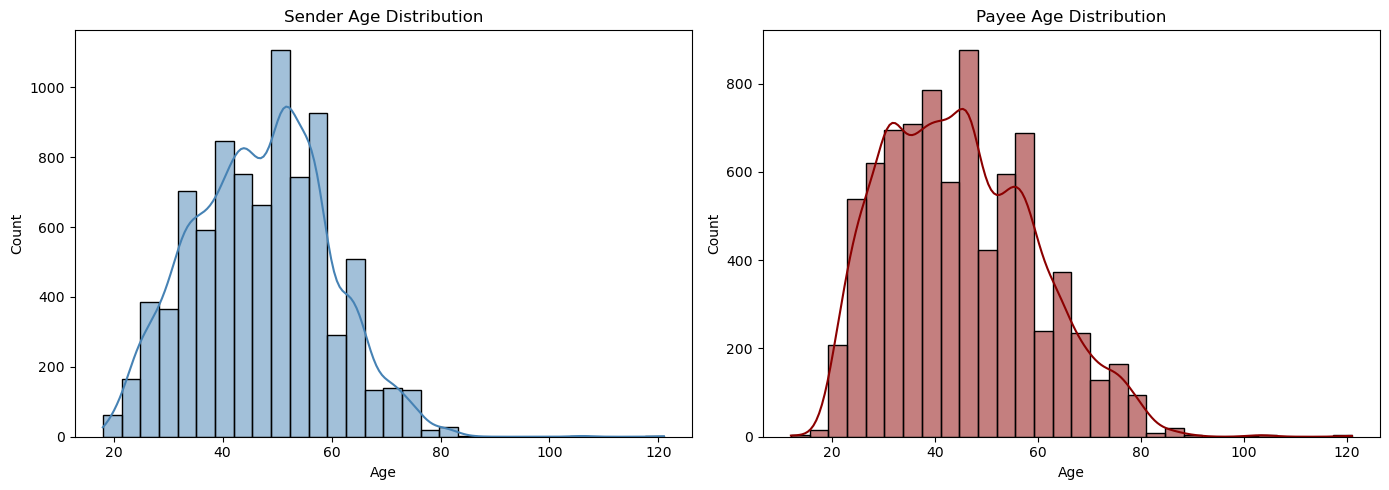

In [171]:
# age distribution for senders and payees

print("Sender Age Summary:")
print(df["Sender Age"].describe())

print("\n Payee Age Summary:")
print(df["Payee Age"].describe())

# checking for unexpected/outliers 
print("\nOutlier Ages (Senders > 100 or < 18):")
print(df[(df["Sender Age"] > 90) | (df["Sender Age"] < 18)][["Sender Name_", "Sender Age"]].head())

print("\nOutlier Ages (Payees > 100 or < 18):")
print(df[(df["Payee Age"] > 90) | (df["Payee Age"] < 18)][["Payee Name_", "Payee Age"]].head())


fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df["Sender Age"].dropna(), bins=30, ax=axes[0], kde=True, color="steelblue")
axes[0].set_title("Sender Age Distribution")
axes[0].set_xlabel("Age")

sns.histplot(df["Payee Age"].dropna(), bins=30, ax=axes[1], kde=True, color="darkred")
axes[1].set_title("Payee Age Distribution")
axes[1].set_xlabel("Age")

plt.tight_layout()
plt.show()


/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/128458689.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=send_state_counts.values, y=send_state_counts.index, ax=axes[0], palette="Blues_r")
/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/128458689.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pay_state_counts.values, y=pay_state_counts.index, ax=axes[1], palette="Reds_r")


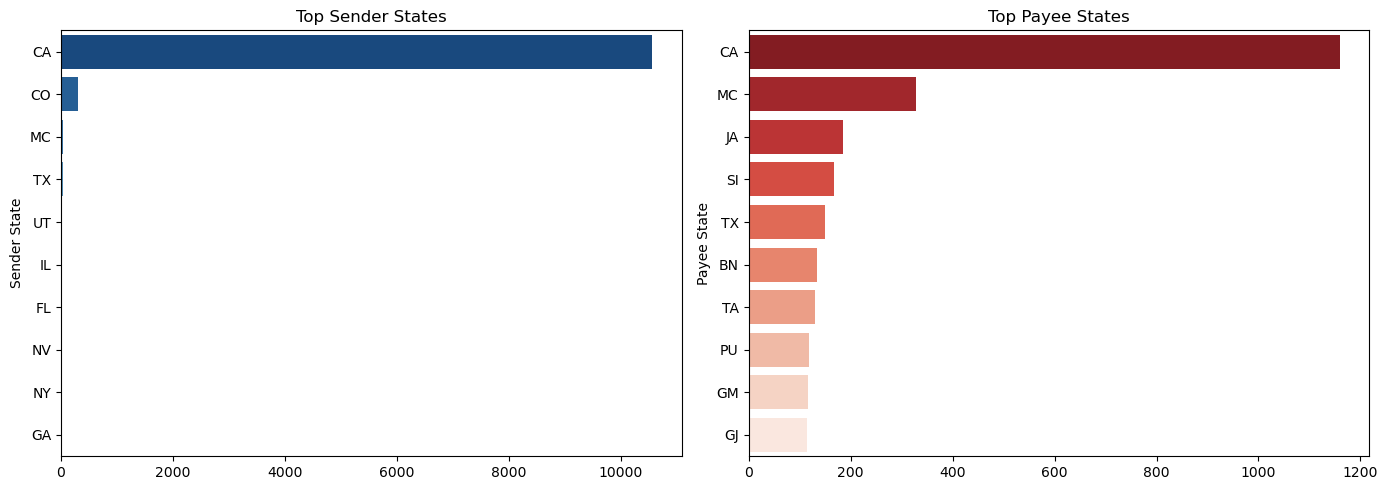

In [172]:
# ransactions by sender state and payee state
send_state_counts = df["Sender State"].value_counts().head(10)
pay_state_counts = df["Payee State"].value_counts().head(10)

# top 10 sender & payee states
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=send_state_counts.values, y=send_state_counts.index, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top Sender States")

sns.barplot(x=pay_state_counts.values, y=pay_state_counts.index, ax=axes[1], palette="Reds_r")
axes[1].set_title("Top Payee States")

plt.tight_layout()
plt.show()

## top payee states outside of CA are international

International Transactions: 9783 (85.82%)


/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/2173047737.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="International", data=df, palette="Set1")


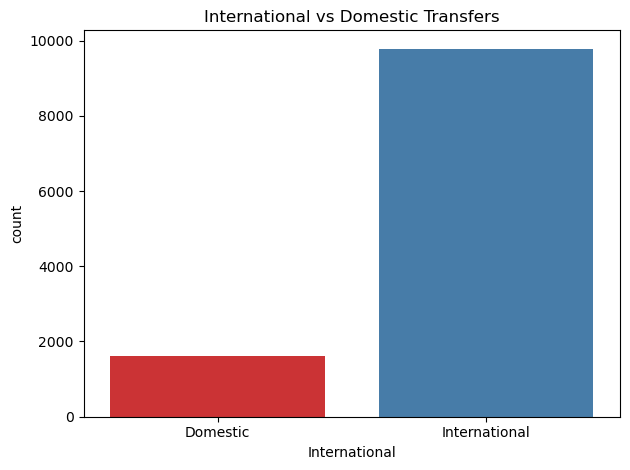

In [173]:
# cross-border flag
df["International"] = (df["Send Country"] != df["Pay Country"])

# count and % of international transfers
intl_count = df["International"].sum()
print(f"International Transactions: {intl_count} ({intl_count/len(df):.2%})")


sns.countplot(x="International", data=df, palette="Set1")
plt.title("International vs Domestic Transfers")
plt.xticks([0, 1], ["Domestic", "International"])
plt.tight_layout()
plt.show()

In [174]:
# repeated amounts by sender
repeated_by_sender = df.groupby(['Sender Name_', 'Amount']).size().reset_index(name='count')
repeated_by_sender = repeated_by_sender[repeated_by_sender['count'] > 1]
print(f"Senders with repeated exact amounts:\n{repeated_by_sender.sort_values('count', ascending=False).head(50)}")

# Export to CSV
repeated_by_sender.to_csv('repeated_amounts_by_sender.csv', index=False)

# repeated amounts by payee
repeated_by_sender = df.groupby(['Payee Name_', 'Amount']).size().reset_index(name='count')
repeated_by_sender = repeated_by_sender[repeated_by_sender['count'] > 1]
print(f"Payees with repeated exact amounts:\n{repeated_by_sender.sort_values('count', ascending=False).head(50)}")

# Export to CSV
repeated_by_payee.to_csv('repeated_amounts_by_payee.csv', index=False)

# repeated amounts by store location / Agents
repeated_by_sender = df.groupby(['Send Agent Name_', 'Amount']).size().reset_index(name='count')
repeated_by_sender = repeated_by_sender[repeated_by_sender['count'] > 1]
print(f"Agents with repeated exact amounts:\n{repeated_by_sender.sort_values('count', ascending=False).head(20)}")

# repeated amounts by store operator
repeated_by_sender = df.groupby(['Send Operator Name_', 'Amount']).size().reset_index(name='count')
repeated_by_sender = repeated_by_sender[repeated_by_sender['count'] > 1]
print(f"Store operator with repeated exact amounts:\n{repeated_by_sender.sort_values('count', ascending=False).head(20)}")


Senders with repeated exact amounts:
     Sender Name_   Amount  count
3553     name_234  1000.00     64
604      name_115   500.00     53
256      name_104  1000.00     50
67        name_10  1009.99     47
6472     name_794   500.00     45
5188      name_38  1000.00     38
5692     name_525   500.00     36
4905      name_31  1000.00     35
452     name_1111   800.00     34
1731    name_1531  1000.00     34
2138     name_172   950.00     33
4894     name_309  1000.00     32
532     name_1129  1000.00     30
5411     name_447  1000.00     30
14        name_10   509.99     29
6511     name_813   500.00     29
5782     name_551  1000.00     29
2737     name_195  1000.00     27
1196    name_1337   500.00     27
3540    name_2336  1000.00     26
1665      name_15   600.00     25
2613    name_1899  1000.00     24
9          name_1  1000.00     23
5415     name_448  1000.00     23
5776      name_55  1000.00     23
2389    name_1818   800.00     23
469     name_1116  1000.00     23
5222      n

NameError: name 'repeated_by_payee' is not defined

/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/3596136329.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amount', y='count', data=top_amounts, palette='flare')


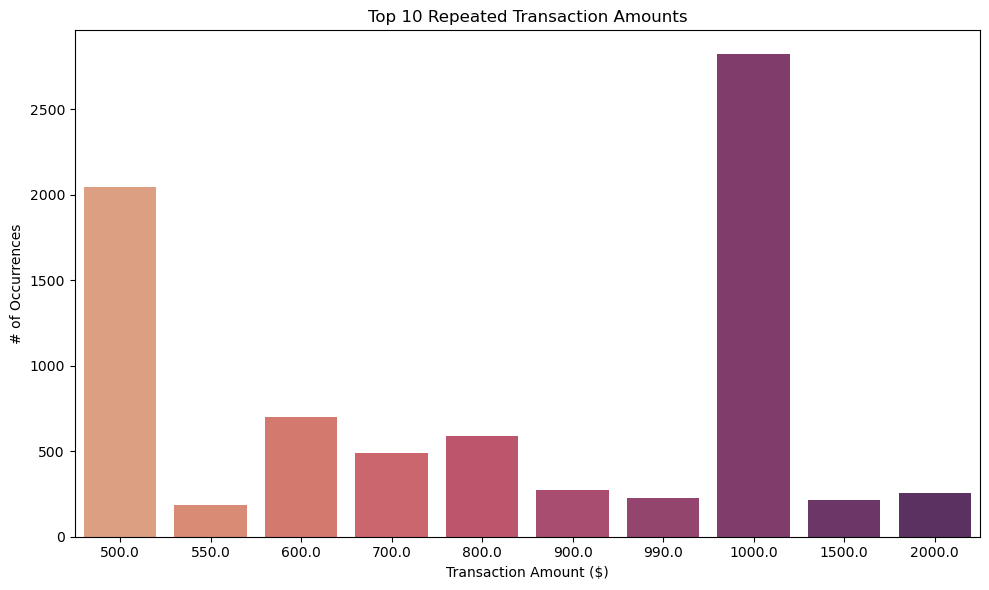

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and sort top repeated amounts
top_amounts = df.groupby('Amount').size().reset_index(name='count')
top_amounts = top_amounts[top_amounts['count'] > 1].sort_values('count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='count', data=top_amounts, palette='flare')
plt.title('Top 10 Repeated Transaction Amounts')
plt.ylabel('# of Occurrences')
plt.xlabel('Transaction Amount ($)')
plt.tight_layout()
plt.show()

In [176]:
# Sort by sender and datetime
df_sorted = df.sort_values(by=['Sender Name_', 'Amount', 'Send DateTime'])

# For each sender-amount group, get time difference to next transaction
df_sorted['Next_Transaction_Time'] = df_sorted.groupby(['Sender Name_', 'Amount'])['Send DateTime'].shift(-1)
df_sorted['Time_Diff_Mins'] = (df_sorted['Next_Transaction_Time'] - df_sorted['Send DateTime']).dt.total_seconds() / 3600

# Flag quick repeats under 5 mins
df_sorted['Repeat_Under_5mins'] = df_sorted['Time_Diff_Mins'] <= (5/60)

# Show flagged examples
quick_repeats = df_sorted[df_sorted['Repeat_Under_5mins']]
print(quick_repeats[['Sender Name_', 'Amount', 'Send DateTime', 'Next_Transaction_Time', 'Time_Diff_Mins']].head(10))


     Sender Name_   Amount       Send DateTime Next_Transaction_Time  \
938        name_1  1000.00 2016-10-12 20:12:00   2016-10-12 20:15:00   
5562       name_1  1000.00 2018-02-19 19:21:00   2018-02-19 19:23:00   
6035       name_1  1000.00 2018-07-11 19:51:00   2018-07-11 19:55:00   
7616       name_1  1000.00 2019-01-19 17:45:00   2019-01-19 17:47:00   
8898       name_1  1000.00 2019-03-19 15:47:00   2019-03-19 15:50:00   
7760       name_1  1500.00 2019-07-10 18:43:00   2019-07-10 18:45:00   
903       name_10   509.99 2016-06-14 14:27:00   2016-06-14 14:30:00   
1035      name_10   509.99 2016-12-11 16:38:00   2016-12-11 16:38:00   
1982      name_10   509.99 2016-12-11 16:38:00   2016-12-11 16:39:00   
877       name_10   509.99 2016-12-22 12:09:00   2016-12-22 12:10:00   

      Time_Diff_Mins  
938         0.050000  
5562        0.033333  
6035        0.066667  
7616        0.033333  
8898        0.050000  
7760        0.033333  
903         0.050000  
1035        0.000000  


In [177]:
# same test for payee

df_sorted_payee = df.sort_values(by=['Payee Name_', 'Amount', 'Pay DateTime']).copy()
df_sorted_payee['Next_Transaction_Time'] = df_sorted_payee.groupby(['Payee Name_', 'Amount'])['Pay DateTime'].shift(-1)
df_sorted_payee['Time_Diff_Mins'] = (
    (df_sorted_payee['Next_Transaction_Time'] - df_sorted_payee['Pay DateTime']).dt.total_seconds() / 3600
)
df_sorted_payee['Repeat_Under_5min'] = df_sorted_payee['Time_Diff_Mins'] <= (5/60)
repeated_payees_24h = df_sorted_payee[df_sorted_payee['Repeat_Under_5min']]

print(repeated_payees_24h[['Payee Name_', 'Amount', 'Pay DateTime', 'Next_Transaction_Time', 'Time_Diff_Mins']].head(10))

      Payee Name_   Amount        Pay DateTime Next_Transaction_Time  \
2887    name_1274  1105.66 2017-06-03 19:10:00   2017-06-03 19:14:00   
3310    name_1274  1105.66 2017-06-03 19:14:00   2017-06-03 19:17:00   
67       name_137   999.99 2015-12-11 13:02:00   2015-12-11 13:05:00   
1035     name_205   509.99 2016-12-11 16:45:00   2016-12-11 16:50:00   
10025   name_2401  2000.00 2020-09-27 14:20:00   2020-09-27 14:20:00   
2557     name_261  1000.00 2016-10-29 18:32:00   2016-10-29 18:34:00   
3873     name_261  1000.00 2017-08-07 11:48:00   2017-08-07 11:53:00   
3017     name_261  1000.00 2017-09-01 11:29:00   2017-09-01 11:32:00   
7687    name_2628   509.99 2019-04-22 12:17:00   2019-04-22 12:20:00   
10461   name_2745  1009.99 2020-03-17 17:07:00   2020-03-17 17:10:00   

       Time_Diff_Mins  
2887         0.066667  
3310         0.050000  
67           0.050000  
1035         0.083333  
10025        0.000000  
2557         0.033333  
3873         0.083333  
3017         0.

Senders NOT from CA (Top 10):
Send Country
GUATEMALA      89
MEXICO         59
EL SALVADOR    31
COSTA RICA      9
PERU            6
HONDURAS        4
TONGA           3
COLOMBIA        3
NEW ZEALAND     2
JORDAN          2
Name: count, dtype: int64


/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/2612615364.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Send Country", data=non_ca_senders, order=non_ca_senders["Send Country"].value_counts().head(10).index, palette="coolwarm")


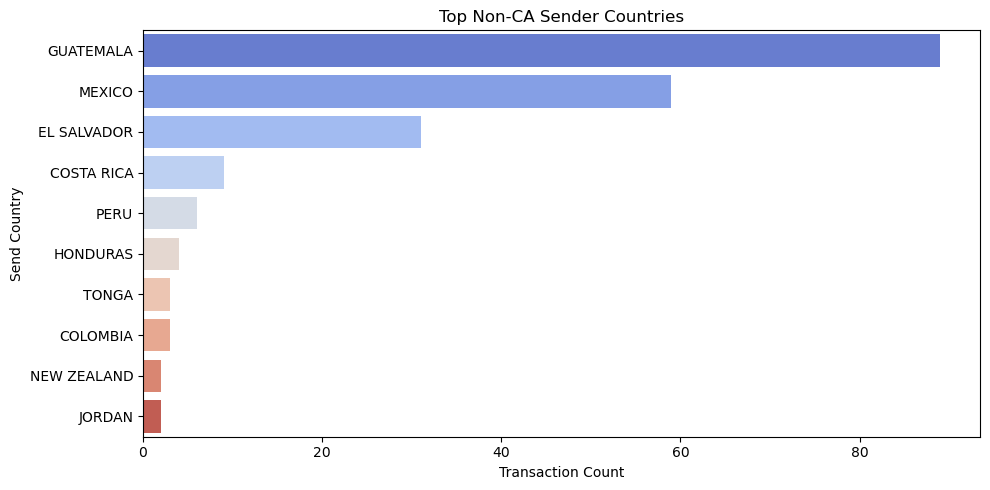

In [178]:
# transactions where sender is not from US
non_ca_senders = df[df["Send Country"] != "UNITED STATES"]

# count sender countries (not in US)
print("Senders NOT from CA (Top 10):")
print(non_ca_senders["Send Country"].value_counts().head(10))

# plotting
plt.figure(figsize=(10, 5))
sns.countplot(y="Send Country", data=non_ca_senders, order=non_ca_senders["Send Country"].value_counts().head(10).index, palette="coolwarm")
plt.title("Top Non-CA Sender Countries")
plt.xlabel("Transaction Count")
plt.tight_layout()
plt.show()

Top 10 Payee Countries:
Pay Country
MEXICO           5449
EL SALVADOR      2162
UNITED STATES    1837
GUATEMALA         753
TONGA             267
HONDURAS          189
PERU              103
COLOMBIA          100
NICARAGUA          55
LAOS               45
Name: count, dtype: int64


/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/3715144375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pay_countries.values, y=top_pay_countries.index, palette="Greens_d")


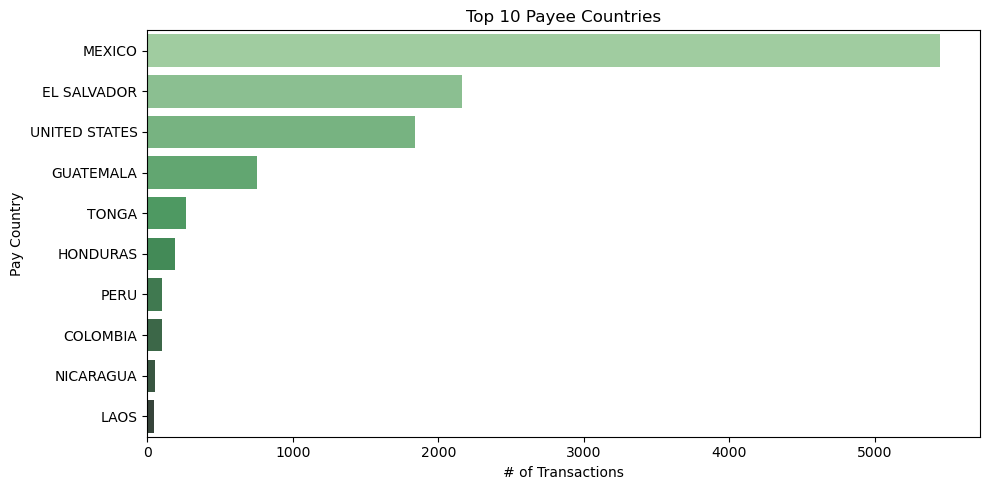

In [179]:
# top payee countries transactions
top_pay_countries = df["Pay Country"].value_counts().head(10)
print("Top 10 Payee Countries:")
print(top_pay_countries)


plt.figure(figsize=(10, 5))
sns.barplot(x=top_pay_countries.values, y=top_pay_countries.index, palette="Greens_d")
plt.title("Top 10 Payee Countries")
plt.xlabel("# of Transactions")
plt.tight_layout()
plt.show()



In [180]:
df["Country Pair"] = df["Send Country"] + " -> " + df["Pay Country"]

# Top pairs
top_country_pairs = df["Country Pair"].value_counts().head(50)
print("Top 50 Country Pairs (Sender to Payee):")
print(top_country_pairs)


Top 50 Country Pairs (Sender to Payee):
Country Pair
UNITED STATES -> MEXICO                  5449
UNITED STATES -> EL SALVADOR             2162
UNITED STATES -> UNITED STATES           1616
UNITED STATES -> GUATEMALA                753
UNITED STATES -> TONGA                    267
UNITED STATES -> HONDURAS                 189
UNITED STATES -> PERU                     103
UNITED STATES -> COLOMBIA                 100
GUATEMALA -> UNITED STATES                 89
MEXICO -> UNITED STATES                    59
UNITED STATES -> NICARAGUA                 55
UNITED STATES -> LAOS                      45
UNITED STATES -> NIGERIA                   35
EL SALVADOR -> UNITED STATES               31
UNITED STATES -> BOLIVA                    29
UNITED STATES -> BULGARIA                  27
UNITED STATES -> NEPAL                     27
UNITED STATES -> SOUTH AFRICA              21
UNITED STATES -> GHANA                     19
UNITED STATES -> COSTA RICA                17
UNITED STATES -> THAILAND  

In [181]:
df["Country Pair"] = df["Send Country"] + " -> " + df["Pay Country"]
non_ca_senders = df[df["Send Country"] != "UNITED STATES"]

percent_non_ca = len(non_ca_senders) / len(df) * 100
print(f"Senders NOT from CA: {len(non_ca_senders)} ({percent_non_ca:.2f}%)")

non_ca_pairs = non_ca_senders["Country Pair"].value_counts().head(50)
print("Top Country Pairs Where Sender is NOT from CA:")
print(non_ca_pairs)


Senders NOT from CA: 221 (1.94%)
Top Country Pairs Where Sender is NOT from CA:
Country Pair
GUATEMALA -> UNITED STATES      89
MEXICO -> UNITED STATES         59
EL SALVADOR -> UNITED STATES    31
COSTA RICA -> UNITED STATES      9
PERU -> UNITED STATES            6
HONDURAS -> UNITED STATES        4
TONGA -> UNITED STATES           3
COLOMBIA -> UNITED STATES        3
NEW ZEALAND -> UNITED STATES     2
JORDAN -> UNITED STATES          2
CANADA -> UNITED STATES          2
ECUADOR -> UNITED STATES         2
SPAIN -> UNITED STATES           1
TAJIKISTAN -> UNITED STATES      1
ITALY -> UNITED STATES           1
GABON -> UNITED STATES           1
CHAD -> UNITED STATES            1
BOLIVA -> UNITED STATES          1
AUSTRALIA -> UNITED STATES       1
LEBANON -> UNITED STATES         1
RUSSIA -> UNITED STATES          1
Name: count, dtype: int64


               transaction_count  avg_amount
Pay Country                                 
MEXICO                      5449      862.97
EL SALVADOR                 2162      823.14
UNITED STATES               1837      999.79
GUATEMALA                    753      928.38
TONGA                        267     1245.67
HONDURAS                     189     1207.60
PERU                         103      977.03
COLOMBIA                     100      892.77
NICARAGUA                     55      743.45
LAOS                          45      794.89
NIGERIA                       35      970.01
BOLIVA                        29     1018.28
NEPAL                         27     2157.67
BULGARIA                      27     1621.11
SOUTH AFRICA                  21     1485.48
GHANA                         19      966.84
COSTA RICA                    17      685.00
THAILAND                      16     2925.00
TAJIKISTAN                    14      828.57
MOROCCO                       14     1519.64


/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/696394405.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


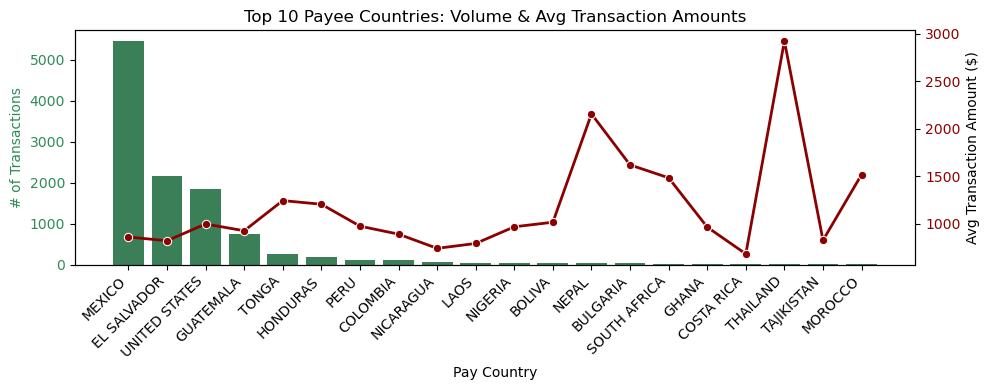

In [182]:
# payee by country 
payee_stats = df.groupby("Pay Country").agg(
    transaction_count=("Amount", "count"),
    avg_amount=("Amount", "mean")
).sort_values(by="transaction_count", ascending=False).head(20)

payee_stats = payee_stats.round(2)
print(payee_stats)  


fig, ax1 = plt.subplots(figsize=(10, 4))

# bar chart # of transactions
sns.barplot(
    x=payee_stats.index,
    y=payee_stats["transaction_count"],
    color="seagreen",
    ax=ax1
)
ax1.set_ylabel("# of Transactions", color="seagreen")
ax1.tick_params(axis='y', labelcolor='seagreen')
ax1.set_title("Top 10 Payee Countries: Volume & Avg Transaction Amounts")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# line chart w/ avg transaction amt
ax2 = ax1.twinx()
sns.lineplot(
    x=payee_stats.index,
    y=payee_stats["avg_amount"],
    color="darkred",
    marker="o",
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel("Avg Transaction Amount ($)", color="black")
ax2.tick_params(axis='y', labelcolor='darkred')

plt.tight_layout()
plt.show()


              transaction_count  avg_amount
Send Country                               
GUATEMALA                    89     1182.40
MEXICO                       59      851.39
EL SALVADOR                  31     1093.53
COSTA RICA                    9     1190.20
PERU                          6     1136.00
HONDURAS                      4      596.15
TONGA                         3      700.00
COLOMBIA                      3      868.79
ECUADOR                       2      947.98
JORDAN                        2     2000.00
NEW ZEALAND                   2      935.42
CANADA                        2     1458.38
GABON                         1     1177.23
BOLIVA                        1      770.00
ITALY                         1     1000.00
LEBANON                       1     1000.00
CHAD                          1     2000.00
RUSSIA                        1      800.00
SPAIN                         1      800.01
TAJIKISTAN                    1     2000.00


/var/folders/mk/46fdb12n6bg_qqncpfglc4fc0000gn/T/ipykernel_5716/3163937328.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


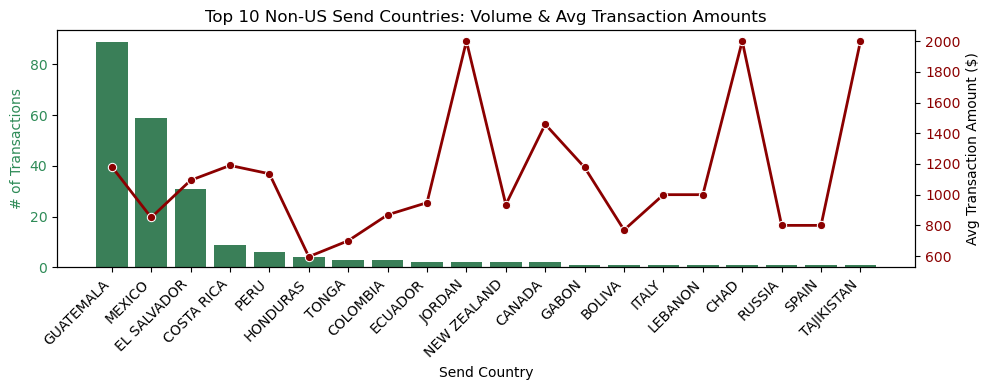

In [183]:
# now doing the same for sender country outside of US (as this is a shop in CA, we'd assume it should be US)

filtered_df = df[df["Send Country"] != "UNITED STATES"]

payee_stats = filtered_df.groupby("Send Country").agg(
    transaction_count=("Amount", "count"),
    avg_amount=("Amount", "mean")
).sort_values(by="transaction_count", ascending=False).head(20)

payee_stats = payee_stats.round(2)
print(payee_stats) 

fig, ax1 = plt.subplots(figsize=(10, 4))

sns.barplot(
    x=payee_stats.index,
    y=payee_stats["transaction_count"],
    color="seagreen",
    ax=ax1
)
ax1.set_ylabel("# of Transactions", color="seagreen")
ax1.tick_params(axis='y', labelcolor='seagreen')
ax1.set_title("Top 10 Non-US Send Countries: Volume & Avg Transaction Amounts")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = ax1.twinx()
sns.lineplot(
    x=payee_stats.index,
    y=payee_stats["avg_amount"],
    color="darkred",
    marker="o",
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel("Avg Transaction Amount ($)", color="black")
ax2.tick_params(axis='y', labelcolor='darkred')

plt.tight_layout()
plt.show()


In [184]:
# FATF lists with countries in ALL CAPS to match your dataset
fatf_blacklist = [
    "DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA",  # North Korea
    "IRAN"
]

fatf_greylist = [
    "ALGERIA",
    "BARBADOS",
    "BOTSWANA",
    "CAMBODIA",
    "GHANA",
    "ICELAND",
    "JORDAN",
    "MALTA",
    "MAURITANIA",
    "MONGOLIA",
    "PANAMA",
    "SYRIA",
    "TUNISIA",
    "UNITED ARAB EMIRATES",
    "ZIMBABWE"
]

#  country pairs
df["Country Pair"] = df["Send Country"] + " -> " + df["Pay Country"]

#  pairs overall
top_country_pairs = df["Country Pair"].value_counts().head(50)
print("Top 50 Country Pairs (Sender to Payee):")
print(top_country_pairs)

# Flag pairs if either send or pay country is on black or grey list
def is_high_risk(row):
    return (
        (row["Send Country"] in fatf_blacklist or row["Pay Country"] in fatf_blacklist) or
        (row["Send Country"] in fatf_greylist or row["Pay Country"] in fatf_greylist)
    )

df["High Risk Country Pair"] = df.apply(is_high_risk, axis=1)

# Filter and get top 50 high-risk pairs
high_risk_pairs = df[df["High Risk Country Pair"]]["Country Pair"].value_counts().head(50)
print("\nTop 50 High Risk Country Pairs (Sender to Payee):")
print(high_risk_pairs)


Top 50 Country Pairs (Sender to Payee):
Country Pair
UNITED STATES -> MEXICO                  5449
UNITED STATES -> EL SALVADOR             2162
UNITED STATES -> UNITED STATES           1616
UNITED STATES -> GUATEMALA                753
UNITED STATES -> TONGA                    267
UNITED STATES -> HONDURAS                 189
UNITED STATES -> PERU                     103
UNITED STATES -> COLOMBIA                 100
GUATEMALA -> UNITED STATES                 89
MEXICO -> UNITED STATES                    59
UNITED STATES -> NICARAGUA                 55
UNITED STATES -> LAOS                      45
UNITED STATES -> NIGERIA                   35
EL SALVADOR -> UNITED STATES               31
UNITED STATES -> BOLIVA                    29
UNITED STATES -> BULGARIA                  27
UNITED STATES -> NEPAL                     27
UNITED STATES -> SOUTH AFRICA              21
UNITED STATES -> GHANA                     19
UNITED STATES -> COSTA RICA                17
UNITED STATES -> THAILAND  

In [185]:
import pandas as pd

#  to flag suspicious age jumps for sender or payee
def flag_suspicious_age_jumps_flag(df, role='Payee', max_age_jump=5):
    name_col = f"{role} Name_"
    age_col = f"{role} Age"
    date_col = 'Send DateTime'
    
    df_sorted = df.sort_values([name_col, date_col]).copy()
    
    age_diff = df_sorted.groupby(name_col)[age_col].diff().abs()
    
    flag_series = pd.Series(False, index=df.index)
    
    suspicious_idx = df_sorted[age_diff > max_age_jump].index
    flag_series.loc[suspicious_idx] = True
    
    return flag_series



# age outliers (Sender or Payee under 18 or over 90)
df['Flag_Age_Outlier'] = (
    (df['Sender Age'] < 18) | (df['Sender Age'] > 90) |
    (df['Payee Age'] < 18) | (df['Payee Age'] > 90)
)

# matching operators
df['Flag_Matching_Operator'] = df['Send Operator Name_'] == df['Pay Operator Name_']

# amount over $5,000
df['Flag_Amount_Over_5000'] = df['Amount'] > 5000

# high risk country
fatf_blacklist = [
    "DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA", "IRAN"
]
fatf_greylist = [
    "ALGERIA", "BARBADOS", "BOTSWANA", "CAMBODIA", "GHANA", "ICELAND",
    "JORDAN", "MALTA", "MAURITANIA", "MONGOLIA", "PANAMA", "SYRIA",
    "TUNISIA", "UNITED ARAB EMIRATES", "ZIMBABWE"
]

def is_high_risk_country(row):
    return (
        row['Send Country'] in fatf_blacklist or row['Pay Country'] in fatf_blacklist or
        row['Send Country'] in fatf_greylist or row['Pay Country'] in fatf_greylist
    )

df['Flag_High_Risk_Country'] = df.apply(is_high_risk_country, axis=1)

# repeated amounts by same sender on same day
df['Send_Date'] = df['Send DateTime'].dt.date
repeated_amounts = df.groupby(['Sender Name_', 'Send_Date', 'Amount']).size().reset_index(name='Repeat_Count')
df = df.merge(repeated_amounts, on=['Sender Name_', 'Send_Date', 'Amount'], how='left', suffixes=('', '_repeat'))
df['Flag_Repeat_Amount'] = df['Repeat_Count'] > 1

# same sender, same amount, next transaction within 5 minutes
df = df.sort_values(by=['Sender Name_', 'Amount', 'Send DateTime'])
df['Next_Transaction_Time'] = df.groupby(['Sender Name_', 'Amount'])['Send DateTime'].shift(-1)
df['Time_Diff_Mins'] = (df['Next_Transaction_Time'] - df['Send DateTime']).dt.total_seconds() / 60
df['Flag_Repeat_Under_5mins'] = df['Time_Diff_Mins'] <= 5

# age jump flag

df['Flag_Sender_Age_Jump'] = flag_suspicious_age_jumps_flag(df, role='Sender', max_age_jump=5)
df['Flag_Payee_Age_Jump'] = flag_suspicious_age_jumps_flag(df, role='Payee', max_age_jump=5)


flag_columns = [
    'Flag_Age_Outlier',
    'Flag_Matching_Operator',
    'Flag_Amount_Over_5000',
    'Flag_High_Risk_Country',
    'Flag_Repeat_Amount',
    'Flag_Repeat_Under_5mins',
    'Flag_Sender_Age_Jump',
    'Flag_Payee_Age_Jump'
]

df['Total_Flags'] = df[flag_columns].sum(axis=1)


display_columns = [
    'Sender Name_', 'Sender Age', 'Flag_Sender_Age_Jump',
    'Payee Name_', 'Payee Age', 'Flag_Payee_Age_Jump',
    'Amount', 'Send DateTime', 'Send Country', 'Pay Country', 'Total_Flags'
] + flag_columns

high_risk_transactions = df[df['Total_Flags'] >= 3]

print(f"Number of high risk transactions (3+ flags): {len(high_risk_transactions)}\n")
print(high_risk_transactions[display_columns].head(100))


Number of high risk transactions (3+ flags): 28

      Sender Name_  Sender Age  Flag_Sender_Age_Jump Payee Name_  Payee Age  \
6024        name_1         NaN                 False   name_4037       70.0   
10084    name_1024        56.0                  True   name_7024       54.0   
5024     name_1116         NaN                 False   name_3269       67.0   
7014     name_1129         NaN                 False   name_3269       52.0   
4088     name_1131         NaN                 False   name_4632       34.0   
3570     name_1217         NaN                 False    name_221       75.0   
6206     name_1271        51.0                 False   name_5670       44.0   
2697     name_1601        52.0                 False   name_5083        NaN   
5935     name_1647         NaN                 False   name_5400       38.0   
6100     name_1762        33.0                 False   name_3821       59.0   
6176     name_1762        33.0                 False   name_3157       38.0   
597

In [186]:

sender_ages = df[['Payee Name_', 'Payee Age', 'Pay DateTime']].dropna()
merged = sender_ages.merge(sender_ages, on='Payee Name_', suffixes=('_1', '_2'))
merged = merged[merged['Pay DateTime_1'] != merged['Pay DateTime_2']]


merged['time_diff_days'] = (merged['Pay DateTime_2'] - merged['Pay DateTime_1']).abs().dt.days
merged['age_diff'] = (merged['Payee Age_2'] - merged['Payee Age_1']).abs()

merged['time_diff_years'] = merged['time_diff_days'] / 365

merged['age_time_mismatch'] = (merged['age_diff'] - merged['time_diff_years']).abs()

mismatches = merged[merged['age_time_mismatch'] > 2]

print(mismatches[['Payee Name_', 'Payee Age_1', 'Pay DateTime_1', 'Payee Age_2', 'Pay DateTime_2', 'age_diff', 'time_diff_years', 'age_time_mismatch']].head(20))


    Payee Name_  Payee Age_1      Pay DateTime_1  Payee Age_2  \
62     name_742         68.0 2018-02-20 09:21:00         58.0   
92     name_742         68.0 2018-07-19 12:39:00         58.0   
113    name_742         68.0 2018-11-02 17:21:00         58.0   
126   name_5379         57.0 2018-12-18 10:23:00         27.0   
140    name_742         68.0 2019-07-11 14:04:00         58.0   
168    name_392         56.0 2016-02-25 11:46:00         56.0   
179    name_813         61.0 2017-04-04 20:43:00         61.0   
196    name_813         61.0 2020-05-08 14:41:00         61.0   
206   name_1053         53.0 2016-07-11 18:29:00         53.0   
229     name_58         42.0 2018-02-02 20:36:00         42.0   
230     name_58         42.0 2018-02-02 20:36:00         32.0   
253     name_58         42.0 2019-01-07 19:41:00         42.0   
254     name_58         42.0 2019-01-07 19:41:00         32.0   
284   name_1812         65.0 2020-08-27 13:39:00         65.0   
323    name_392         5

In [187]:
df['Send DateTime'] = pd.to_datetime(df['Send DateTime'])

payee_ages = df[['Payee Name_', 'Payee Age', 'Send DateTime']].dropna()

# self-merge to get all payee transaction pairs
merged = payee_ages.merge(payee_ages, on='Payee Name_', suffixes=('_1', '_2'))

# remove identical transactions
merged = merged[merged['Send DateTime_1'] != merged['Send DateTime_2']]

# Calculate differences
merged['time_diff_days'] = (merged['Send DateTime_2'] - merged['Send DateTime_1']).abs().dt.days
merged['age_diff'] = (merged['Payee Age_2'] - merged['Payee Age_1']).abs()

# convert days to years
merged['time_diff_years'] = merged['time_diff_days'] / 365

# Compute mismatch
merged['age_time_mismatch'] = (merged['age_diff'] - merged['time_diff_years']).abs()

# Flag large mismatches (threshold = 2 years)
mismatches = merged[merged['age_time_mismatch'] > 2]

# Count unique suspicious payees
suspicious_payees_count = mismatches['Payee Name_'].nunique()

print(f"Number of payees with suspicious age mismatches: {suspicious_payees_count}")

# Optionally, show top offenders by max mismatch
top_offenders = mismatches.groupby('Payee Name_')['age_time_mismatch'].max().sort_values(ascending=False).head(10)
print(top_offenders)


Number of payees with suspicious age mismatches: 242
Payee Name_
name_3756    54.980822
name_5971    41.734247
name_5468    39.904110
name_4963    38.397260
name_343     36.613699
name_6723    34.975342
name_6340    33.641096
name_3959    33.580822
name_4699    30.945205
name_6728    29.983562
Name: age_time_mismatch, dtype: float64


In [188]:
def flag_suspicious_age_jumps(df, role='Payee', max_age_jump=5):

    name_col = f"{role} Name_"
    age_col = f"{role} Age"
    
    df_sorted = df.sort_values([name_col, 'Send DateTime']).copy()
    
    df_sorted['Age_Diff'] = df_sorted.groupby(name_col)[age_col].diff().abs()
    
    suspicious = df_sorted[df_sorted['Age_Diff'] > max_age_jump]
    
    print(f"Found {len(suspicious)} suspicious {role} age jumps > {max_age_jump} years.")
    
    return suspicious[[name_col, 'Pay DateTime', age_col, 'Age_Diff']]

# examples
suspect_senders = flag_suspicious_age_jumps(df, role='Sender', max_age_jump=5)
print(suspect_senders.head())

suspect_payees = flag_suspicious_age_jumps(df, role='Payee', max_age_jump=5)
print(suspect_payees.head())


Found 87 suspicious Sender age jumps > 5 years.
      Sender Name_        Pay DateTime  Sender Age  Age_Diff
10084    name_1024 2020-09-26 12:54:00        56.0      26.0
1168      name_103 2016-07-08 19:43:00        46.0      10.0
1446      name_103 2016-08-22 15:18:00        56.0      10.0
2820     name_1047 2017-02-28 11:08:00        78.0       6.0
3316     name_1047 2017-05-04 11:08:00        72.0       6.0
Found 81 suspicious Payee age jumps > 5 years.
      Payee Name_        Pay DateTime  Payee Age  Age_Diff
9103    name_1125 2020-03-05 13:58:00       53.0      25.0
6045    name_1706 2018-07-16 19:30:00       56.0      23.0
3570     name_221 2017-06-11 14:13:00       75.0      29.0
11298   name_2500 2020-05-06 17:46:00       60.0      19.0
1638    name_3062 2016-09-17 12:50:00       63.0      14.0
